<a href="https://colab.research.google.com/github/sisury09/deep-learning-keras-tf-tutorial/blob/master/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
y_test.shape

(10000,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

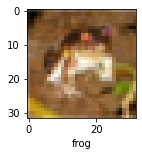

In [11]:
plot_sample(X_train, y_train, 0)

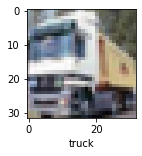

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8126 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.6234 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5410 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4802 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4336 - accuracy: 0.4964


**You can see that at the end of 5 epochs, accuracy is at around 49%**

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4361 - accuracy: 0.4849
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0861 - accuracy: 0.6202
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9587 - accuracy: 0.6669
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8670 - accuracy: 0.6989
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8040 - accuracy: 0.7215
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7449 - accuracy: 0.7419
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6904 - accuracy: 0.7589
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6374 - accuracy: 0.7767
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5952 - accuracy: 0.7902
Epoch 10/10
1563/1563 [==============================] - 66s 42m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)



313/313 [==============================] - 4s 13ms/step - loss: 0.9633 - accuracy: 0.6926


[0.9632776379585266, 0.6926000118255615]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[7.86622346e-04, 1.99812184e-05, 5.64595219e-03, 9.29878414e-01,
        1.09182228e-03, 6.05234168e-02, 1.08830596e-03, 1.04319159e-04,
        8.52192228e-04, 8.95653648e-06],
       [1.19604209e-07, 2.52165091e-06, 1.18424603e-09, 6.39916919e-08,
        8.30434610e-11, 6.38417583e-11, 2.78223776e-12, 3.86771947e-14,
        9.99995768e-01, 1.38521932e-06],
       [8.78200307e-02, 2.96885312e-01, 1.95791409e-03, 4.47194800e-02,
        3.87158274e-04, 1.33599469e-03, 1.73296401e-04, 5.68101008e-04,
        3.95737052e-01, 1.70415580e-01],
       [6.78654969e-01, 1.56462181e-03, 9.73987058e-02, 1.84294134e-02,
        9.37195960e-03, 1.98411391e-04, 9.09330964e-04, 1.15880930e-05,
        1.93357214e-01, 1.03805534e-04],
       [3.44463160e-07, 4.41992102e-04, 4.03187657e-03, 7.92657733e-02,
        4.75128978e-01, 2.98289070e-03, 4.38079119e-01, 9.16382760e-07,
        5.82214489e-05, 9.86898795e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

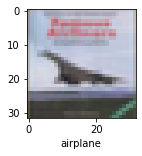

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
import cv2

In [70]:
new_image = cv2.imread('/content/house.jpg')
new_image = new_image/255
new_image.shape

(506, 900, 3)

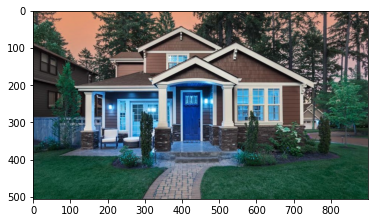

In [71]:
plt.imshow(new_image)

In [72]:
new_image.shape

(506, 900, 3)

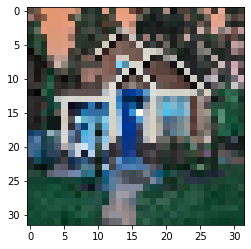

In [73]:
#new_image = (cv2.resize(new_image,(32,32)))
#new_image.shape
#plt.imshow(new_image)

In [78]:
reimage = new_image.reshape((1,32,32,3))

In [75]:
cnn.predict(reimage)

1/1 [==============================] - 0s 19ms/step


array([[9.5181989e-05, 1.2941776e-01, 1.8655574e-04, 2.6258254e-05,
        2.3549100e-04, 6.1361084e-04, 8.2807889e-04, 2.3044775e-04,
        1.6527229e-04, 8.6820132e-01]], dtype=float32)

In [76]:
classes[np.argmax(cnn.predict(reimage))]

1/1 [==============================] - 0s 17ms/step


'truck'